In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'chaos'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：混沌因子(chaos factor)   
因子定义：混沌因子的常规混沌指标，定义见计算公式   
因子计算公式：
$$
factor_t = \sin(\frac{price_t}{\frac{price_t}{price_{t-\delta_t}} - 1})
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : chaos
fields : ['close']
other_dIepend_factors : None
calc_params : {'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-0.9999999999999959, 0.9999999999994272]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

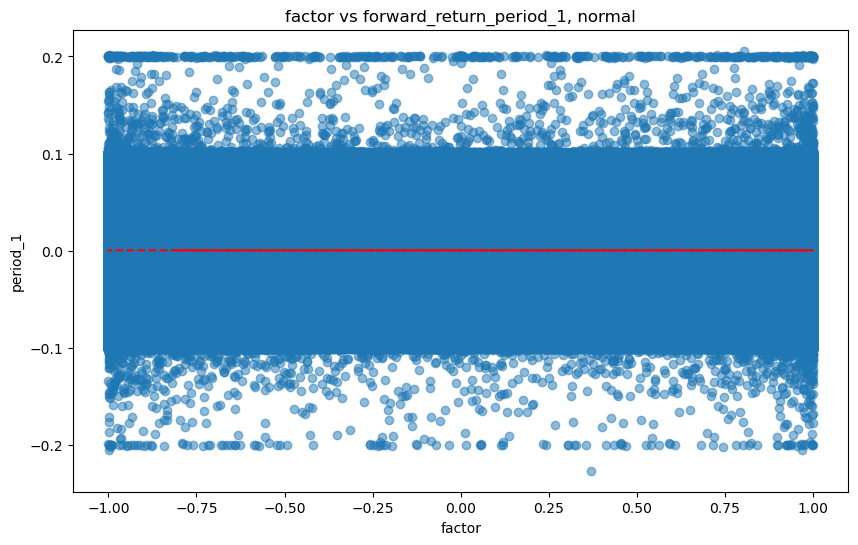

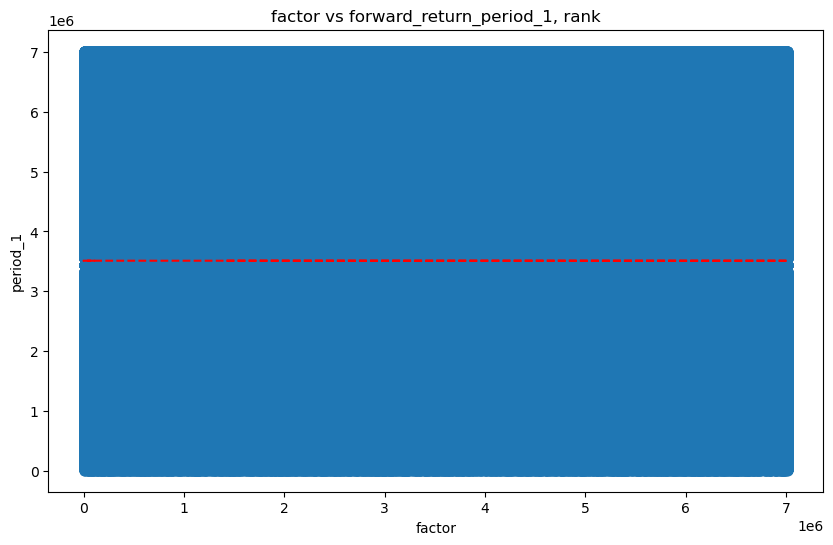

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

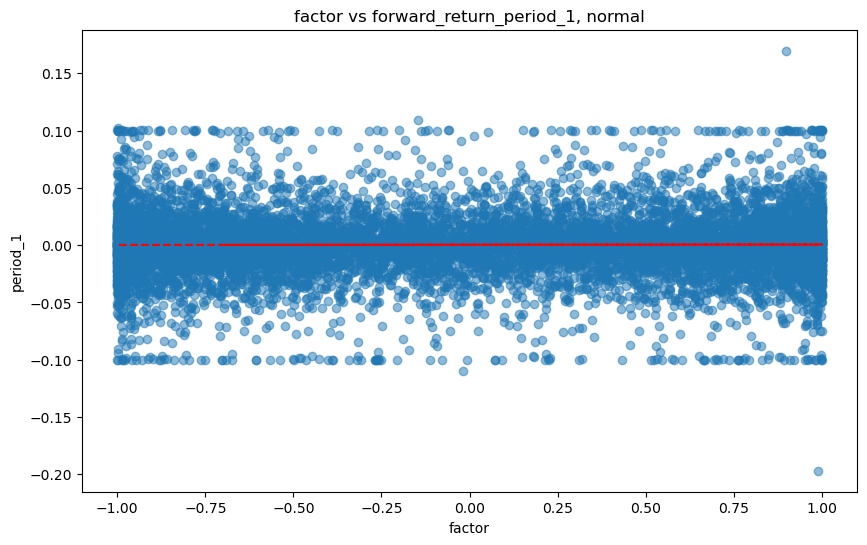

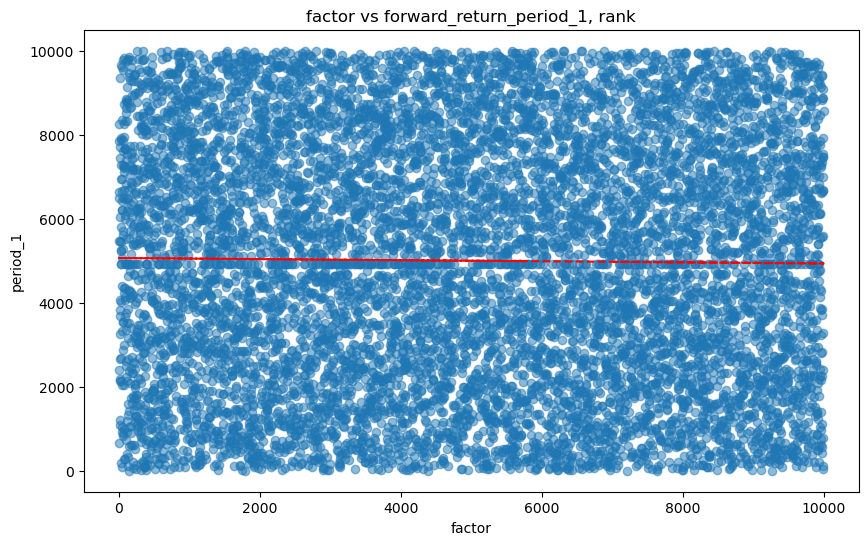

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

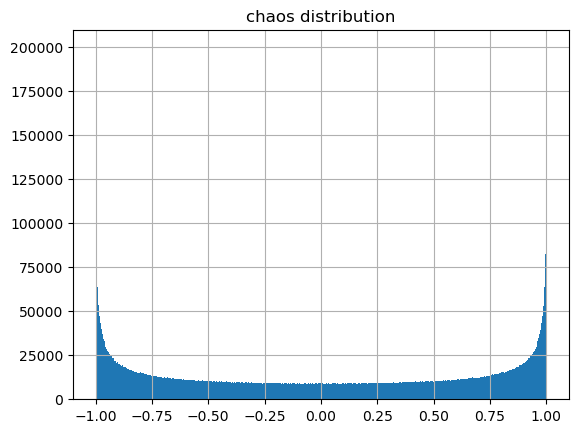

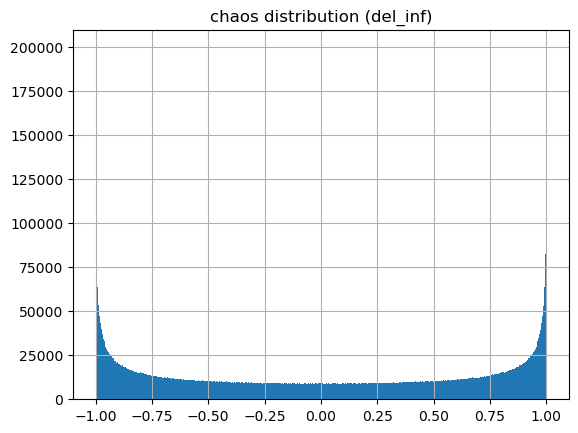

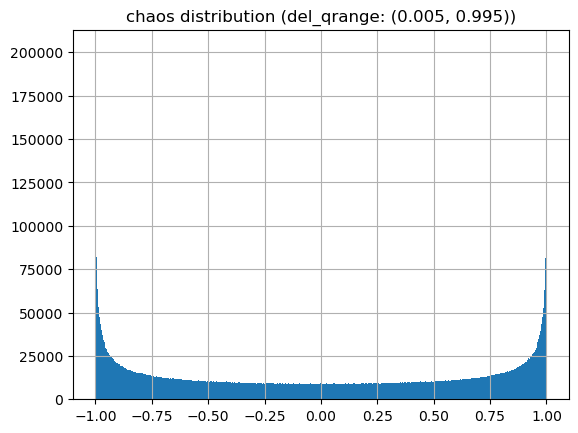

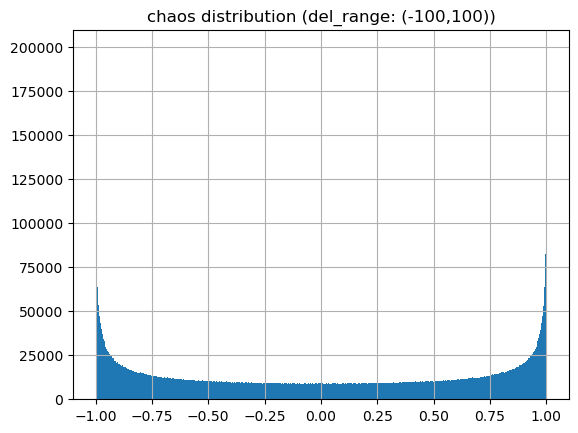

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-100,100))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.000056 -0.000017 -0.000206 -0.000126 -0.000122   
norm_ic_std           0.020129  0.020026  0.020313  0.020367  0.020217   
norm_ic_0.02_percent  0.313014  0.313762  0.312266  0.324981  0.316006   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.002777 -0.000864 -0.010147 -0.006198 -0.006026   
norm_abs_ic          -0.000042  0.000163  0.000095  0.000176  0.000058   
rank_ic_mean          0.000164 -0.000099 -0.000326 -0.000074 -0.000145   
rank_ic_std           0.019891  0.020028  0.020021  0.020061   0.02022   
rank_ic_0.02_percent   0.31451  0.315632  0.316006  0.313388   0.31825   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir               0.008247 -0.004951 -0.016301 -0.003686 -0.007151   
rank_abs_ic          -0.000083  0.000022  0.000048  0.000187  0.000265   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

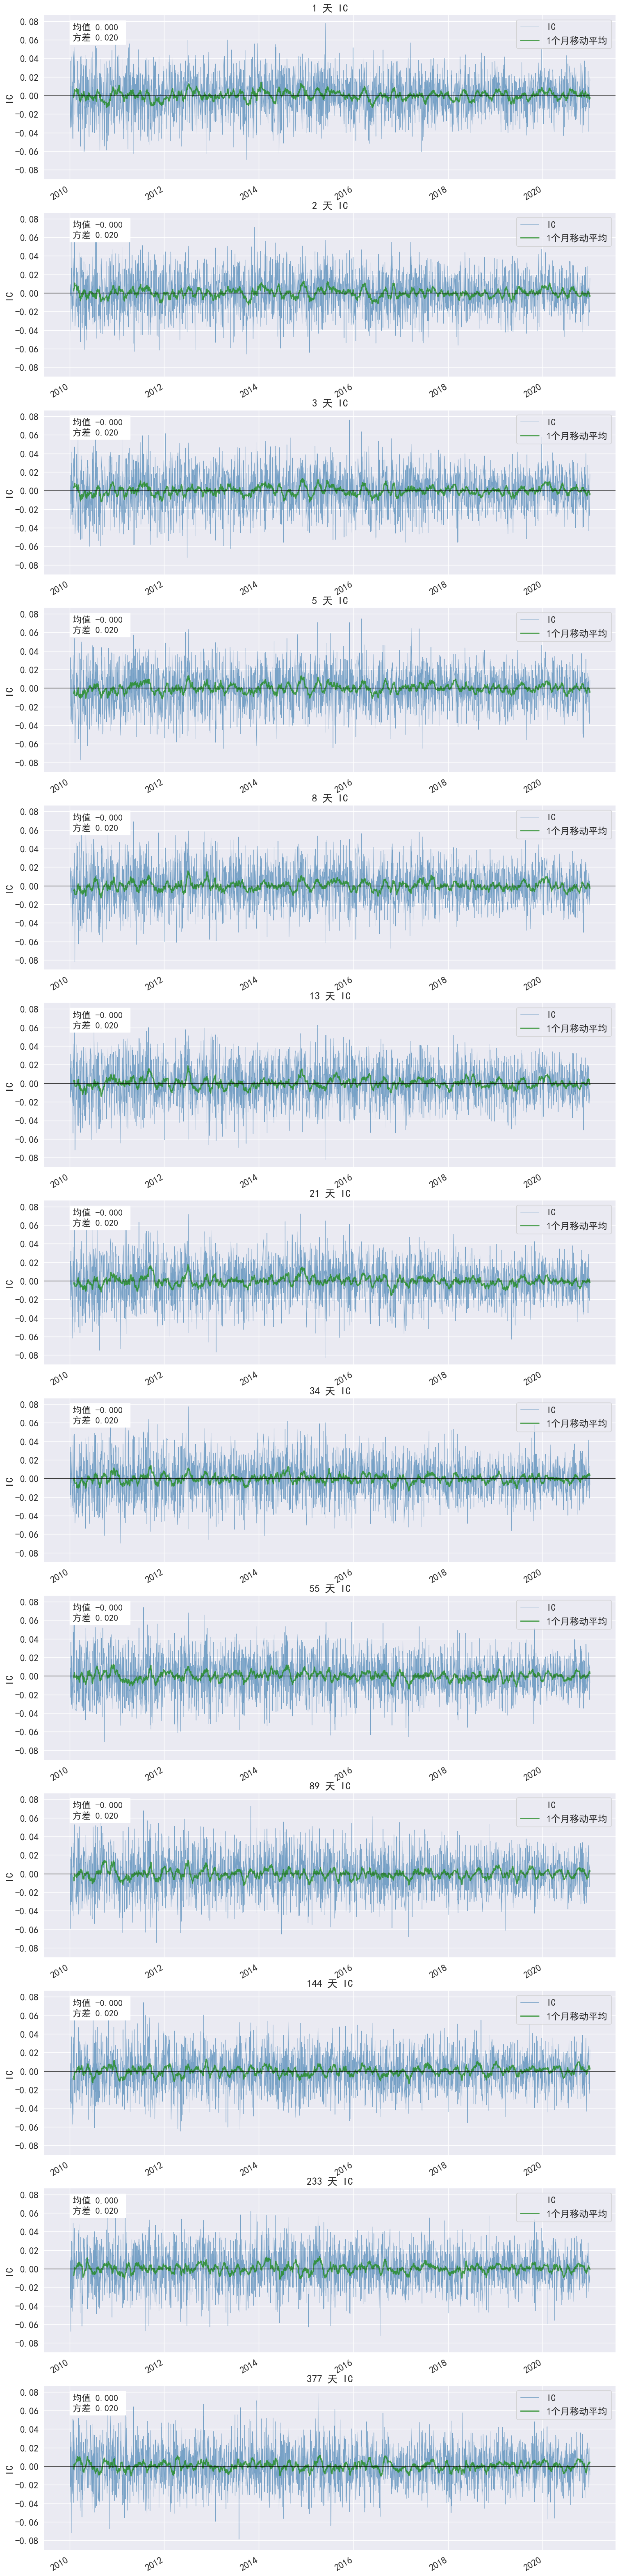

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

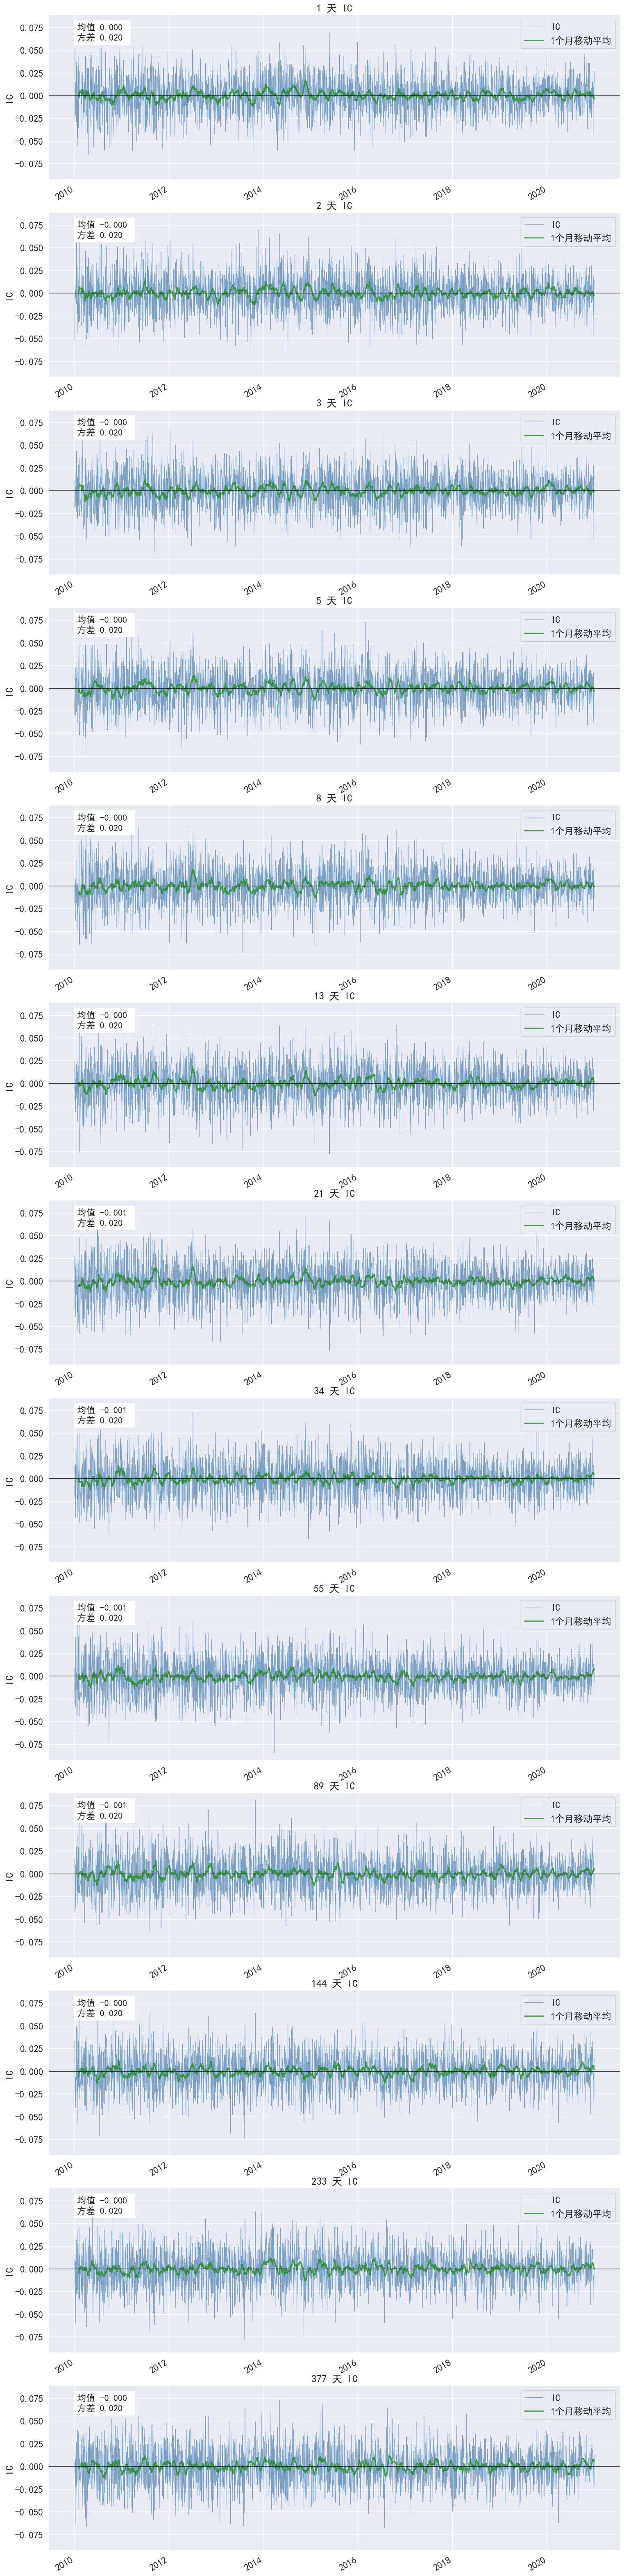

In [13]:
zy_fa.plot_rank_ic_ts()